In [1]:
import numpy as np
import pandas as pd
import joblib
import sqlalchemy
import tensorflow as tf
import warnings
import os
import FactorizationMachine as fm
import Preprocess as prep
from sklearn.metrics import roc_curve,confusion_matrix,recall_score,auc,accuracy_score,recall_score,roc_auc_score
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
path_model='E:\\kyk-ml\\Recommendation_FactorModel+lightgbm\\'

In [2]:
train=prep.load_full_data('2021/2/1','2021/2/2')
item_pool=prep.load_item_pool('2021/2/1','2021/2/2')
data=prep.NegativeSampling(train,item_pool,ratio=10)
y=data['label'].values
X=data.drop(columns='label')
X=prep.process_data(X)
trainset=tf.data.Dataset.from_tensor_slices((X.toarray(),y))
trainset=trainset.batch(512)
del X

100%|██████████| 2/2 [00:00<00:00, 100.27it/s]


In [29]:
model=fm.FactorizationMachine(output_dim=100)   
if os.path.exists(path_model+'factors.h5'):
    print('loading model.\n')
    model.predict(trainset)
    model.load_weights(path_model+'factors.h5')
    model.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(0.01),metrics=[tf.keras.metrics.BinaryAccuracy(),fm.roc_auc,tf.keras.metrics.Recall()])
    model.evaluate(trainset)
    model.fit(trainset,epochs=5)
else:
    model.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(0.01),metrics=[tf.keras.metrics.BinaryAccuracy(),fm.roc_auc,tf.keras.metrics.Recall()])
    model.fit(trainset,epochs=25)
    model.evaluate(trainset)
    model.summary()
    model.save_weights(path_model+'factors.h5')

loading model.

122/122 [==============================] - 2s 7ms/step - loss: 0.1696 - binary_accuracy: 0.9231 - roc_auc: 0.9480 - recall_1: 0.3528
Epoch 1/5
122/122 [==============================] - 1s 8ms/step - loss: 0.1746 - binary_accuracy: 0.9202 - roc_auc: 0.9438 - recall_1: 0.3524
Epoch 2/5
122/122 [==============================] - 1s 8ms/step - loss: 0.1716 - binary_accuracy: 0.9205 - roc_auc: 0.9458 - recall_1: 0.3615
Epoch 3/5
122/122 [==============================] - 1s 8ms/step - loss: 0.1697 - binary_accuracy: 0.9208 - roc_auc: 0.9468 - recall_1: 0.3664
Epoch 4/5
122/122 [==============================] - 1s 8ms/step - loss: 0.1678 - binary_accuracy: 0.9213 - roc_auc: 0.9478 - recall_1: 0.3740
Epoch 5/5
122/122 [==============================] - 1s 8ms/step - loss: 0.1661 - binary_accuracy: 0.9213 - roc_auc: 0.9487 - recall_1: 0.3779


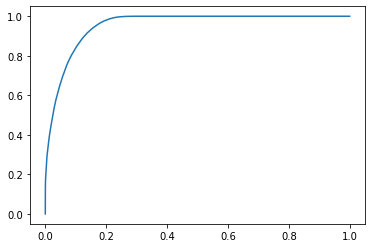

In [30]:
y_pred=model.predict(trainset)
fpr,tpr,threshold=roc_curve(y,y_pred,drop_intermediate=False)
plt.plot(fpr,tpr)
plt.show()

In [31]:
y_pred[y_pred>0.1]=1
y_pred[y_pred<=0.1]=0

In [32]:
recall_score(y,y_pred)

0.9636942675159236